# Netflix Movie & TV Content Analysis 

## Data Capstone Project - Summer 2020


*Chasity Castro*

*On my honor, as a student, I have neither given nor received unauthorized aid on this acdemic work*

## Business Problem 

Over the last decade streaming services such as Netflix, Hulu, Prime Video, and Disney+ have become increasingly popular. As the industry grows, so do the platform options for content providers/distributors. Having an idea of the content typically accepted by each streaming service may save content distributors valuable time when starting licensing discussions about a specific title. 


 

## Project Scope 

1. What types of titles are available on Netflix? 
2. Has Netflix become more focused on TV content over the years?
3. Which genres on Netflix contain the highest number of titles?
4. Which countries produce the largest number of titles on Netflix?
5. Who are the top actors/actresses on Netflix?
6. Which title ratings (G, PG, PG-13, R, etc.) contain the highest number of titles?
7. What factors are important in determining whether or not a movie/show will be added on Netflix?


## Expected Benefits

After reviewing the datasets, we should have a clearer idea of the factors that Netflix considers important when selecting new movies and TV shows to offer to customers. This information may be beneficial to content providers and distributors when deciding what movie/shows to present to Netflix.

In addition, the content analysis results may be useful for other streaming services. It may be useful for competitors to have an idea of the content offered on Netflix so that they can better distinguish themselves from Netflix and avoid direct competition. 



### Import & Clean Data 

In [79]:
#import packages 

import csv
import pandas as pd
import numpy as np

import collections
from collections import Counter 

import matplotlib.pyplot as plt
%matplotlib inline

import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords

import os
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

from sklearn.neighbors import KNeighborsClassifier

from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [80]:
#import dataset 

df=pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [81]:
#drop unnecessary columns - "release years", "show id"

df.drop (["show_id"], axis = 1, inplace = True)


df.drop (["description"], axis = 1, inplace = True)

df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies"
1,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy
2,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV
3,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV
4,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies


In [82]:
#find missing values in dataset  

df.isnull().sum()

type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
dtype: int64

In [83]:
#change date added to numeric format, show only the year added and change column title 

df['date_added'] = pd.to_datetime(df['date_added']).dt.strftime('%Y')
df.head()

#rename column date_added to year_added
df=df.rename(columns={'date_added':'year_added'})
df.head()


,type,title,director,cast,country,year_added,release_year,rating,duration,listed_in
0,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019,2019,TV-PG,90 min,"Children & Family Movies, Comedies"
1,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016,2016,TV-MA,94 min,Stand-Up Comedy
2,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018,2013,TV-Y7-FV,1 Season,Kids' TV
3,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018,2016,TV-Y7,1 Season,Kids' TV
4,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017,2017,TV-14,99 min,Comedies


### Analysis of Available Titles 

In [84]:
#total number of titles available

df['type'].count()

6234

In [85]:
#types of titles
df.groupby('type').size()


type
Movie      4265
TV Show    1969
dtype: int64

Text(0.5, 1.0, 'Types of Titles on Netflix')

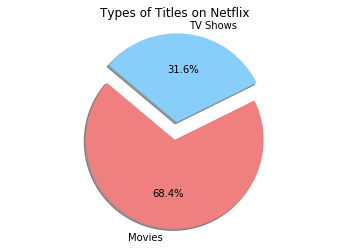

In [86]:
#pie chart displaying types of titles of available on Netflix 

data = [4265,1969]
colors = ['lightcoral', 'lightskyblue']
labels = ['Movies', 'TV Shows']
explode = (0.2, 0) 

plt.pie(data, labels=labels, explode=explode, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title("Types of Titles on Netflix")

***There are currently 6,234 titles on Netflix - of these titles 4,265 are movies and 1,969 are TV shows. 68.4% of titles on Netflix are movies, while 31.6% are TV Shows. From the above data analysis we can conclude that there are roughly twice as many movies on Netflix as there are TV Shows.***

### Analysis of Available Titles Based on Year Added 

In [87]:
#distribution of titles based on year added   

df.groupby('year_added').size()

year_added
2008       2
2009       2
2010       1
2011      13
2012       7
2013      12
2014      25
2015      90
2016     456
2017    1300
2018    1782
2019    2349
2020     184
dtype: int64

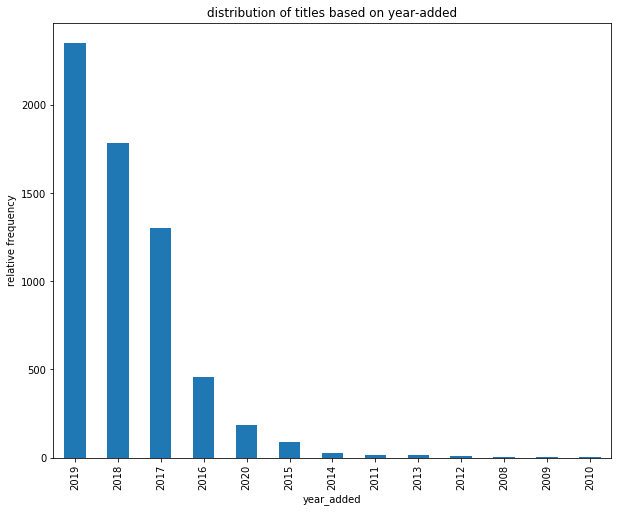

In [88]:
#bar chart displaying available titles based on year added 

plt.figure(figsize=(10,8))
df['year_added'].value_counts().plot.bar()
plt.title('distribution of titles based on year-added')
plt.ylabel('relative frequency')
plt.xlabel('year_added')
plt.show()

***Many of the titles available on Netflix were added in within the last five years (2015-2020). There are very limited number of titles added from 2008-2014. However, since 2017 roughly 500 titles have been added each year.***

In [89]:
#title type based on year added 

df.groupby(['year_added', 'type'])['type'].count()

year_added  type   
2008        Movie         1
            TV Show       1
2009        Movie         2
2010        Movie         1
2011        Movie        13
2012        Movie         4
            TV Show       3
2013        Movie         6
            TV Show       6
2014        Movie        19
            TV Show       6
2015        Movie        58
            TV Show      32
2016        Movie       264
            TV Show     192
2017        Movie       913
            TV Show     387
2018        Movie      1290
            TV Show     492
2019        Movie      1546
            TV Show     803
2020        Movie       147
            TV Show      37
Name: type, dtype: int64

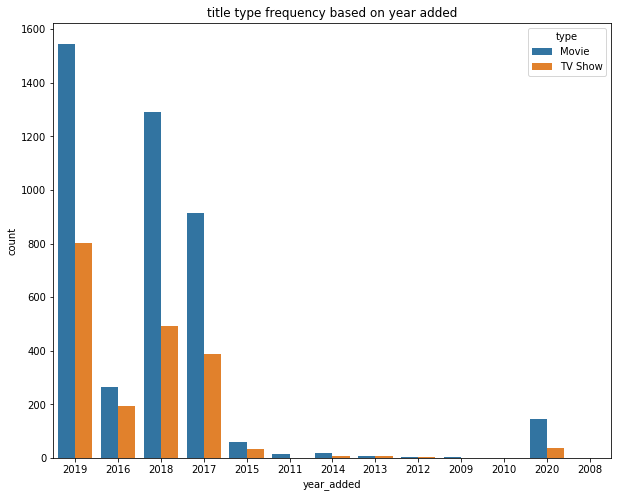

In [90]:
#bar graph comparing title type based on year added

plt.figure(figsize=(10,8))
sns.countplot(x='year_added',hue='type',data=df)
plt.title('title type frequency based on year added')
plt.show()

***Using the above information we can conclude that about twice as many movies as shows are added each year. However, we do see an exception to this in 2016 in which the difference in number of movies addded and number of shows added is only about 100.***

In [91]:
#convert type to dummy variable 

df['type'] = df['type'].map({'Movie': 0, 'TV Show': 1})
df.head()

,type,title,director,cast,country,year_added,release_year,rating,duration,listed_in
0,0,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019,2019,TV-PG,90 min,"Children & Family Movies, Comedies"
1,0,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,2016,2016,TV-MA,94 min,Stand-Up Comedy
2,1,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018,2013,TV-Y7-FV,1 Season,Kids' TV
3,1,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018,2016,TV-Y7,1 Season,Kids' TV
4,0,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017,2017,TV-14,99 min,Comedies


In [93]:
#table displaying titles types based on year added 

data1 = [['2008', 1,1], ['2009', 2,0], ['2010', 1,0], ['2011', 13,0], ['2012', 4,3], ['2013', 6,6], ['2014', 19,6], ['2015', 58,32], ['2016', 264,192], ['2017', 913,387], ['2018', 1290,492], ['2019', 1546,803], ['2020',147,37]]
df1 = pd.DataFrame(data1, columns = ['Year', 'Movies', 'TV Shows']) 
df1

    
df1['Total Titles'] = df1['Movies'] + df1['TV Shows']
df1.head()

df1['% Movies'] = df1['Movies'] / df1 ['Total Titles']
df1.head(13)


,Year,Movies,TV Shows,Total Titles,% Movies
0,2008,1,1,2,0.500000
1,2009,2,0,2,1.000000
2,2010,1,0,1,1.000000
3,2011,13,0,13,1.000000
4,2012,4,3,7,0.571429
5,2013,6,6,12,0.500000
6,2014,19,6,25,0.760000
7,2015,58,32,90,0.644444
8,2016,264,192,456,0.578947
9,2017,913,387,1300,0.702308


***Taking a look at the exact number of movies added vs. tv shows added demonstrates that Netflix over the years has focused on adding more movies than tv shows. Each year movies make up 65-75% of the titles added to Netflix.*** 

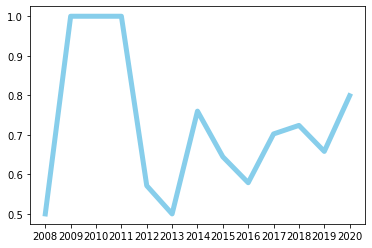

In [94]:
#percentage of movies available on Netflix since 2008 

plt.plot( 'Year', '% Movies', data=df1, color='skyblue',linewidth=5)
plt.show()

***Looking at the above line graph we see that from 2008-2011 Netflix was largerly movie focused. However, starting in 2012 Netflix began adding show content, lowering the percentage of movies available. The trend does fluctuate, but movie content addded seems to reamin above 65%.***

### Genre Analysis 

In [111]:
#top genres 

col = "listed_in"
categories = ", ".join(df['listed_in']).split(", ")
counter_list = Counter(categories).most_common(50)
labels = [_[0] for _ in counter_list][::-1]
values = [_[1] for _ in counter_list][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", name="TV Shows", marker=dict(color="#a678de"))

data = [trace1]
layout = go.Layout(title="Popular Genres", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

***There are a wide variety of genres available on Netflix. The most popular genre is International Movies with 1,927 titles. The second most popular genre is Dramas with 1,623 titles. The third most popular genre is Comedies with 1,113 titles.*** 

### Global Analysis 

In [96]:
#map displaying various countries the titles on Netflix are produced in 

country_codes = {'afghanistan': 'AFG',
 'albania': 'ALB',
 'algeria': 'DZA',
 'american samoa': 'ASM',
 'andorra': 'AND',
 'angola': 'AGO',
 'anguilla': 'AIA',
 'antigua and barbuda': 'ATG',
 'argentina': 'ARG',
 'armenia': 'ARM',
 'aruba': 'ABW',
 'australia': 'AUS',
 'austria': 'AUT',
 'azerbaijan': 'AZE',
 'bahamas': 'BHM',
 'bahrain': 'BHR',
 'bangladesh': 'BGD',
 'barbados': 'BRB',
 'belarus': 'BLR',
 'belgium': 'BEL',
 'belize': 'BLZ',
 'benin': 'BEN',
 'bermuda': 'BMU',
 'bhutan': 'BTN',
 'bolivia': 'BOL',
 'bosnia and herzegovina': 'BIH',
 'botswana': 'BWA',
 'brazil': 'BRA',
 'british virgin islands': 'VGB',
 'brunei': 'BRN',
 'bulgaria': 'BGR',
 'burkina faso': 'BFA',
 'burma': 'MMR',
 'burundi': 'BDI',
 'cabo verde': 'CPV',
 'cambodia': 'KHM',
 'cameroon': 'CMR',
 'canada': 'CAN',
 'cayman islands': 'CYM',
 'central african republic': 'CAF',
 'chad': 'TCD',
 'chile': 'CHL',
 'china': 'CHN',
 'colombia': 'COL',
 'comoros': 'COM',
 'congo democratic': 'COD',
 'Congo republic': 'COG',
 'cook islands': 'COK',
 'costa rica': 'CRI',
 "cote d'ivoire": 'CIV',
 'croatia': 'HRV',
 'cuba': 'CUB',
 'curacao': 'CUW',
 'cyprus': 'CYP',
 'czech republic': 'CZE',
 'denmark': 'DNK',
 'djibouti': 'DJI',
 'dominica': 'DMA',
 'dominican republic': 'DOM',
 'ecuador': 'ECU',
 'egypt': 'EGY',
 'el salvador': 'SLV',
 'equatorial guinea': 'GNQ',
 'eritrea': 'ERI',
 'estonia': 'EST',
 'ethiopia': 'ETH',
 'falkland islands': 'FLK',
 'faroe islands': 'FRO',
 'fiji': 'FJI',
 'finland': 'FIN',
 'france': 'FRA',
 'french polynesia': 'PYF',
 'gabon': 'GAB',
 'gambia, the': 'GMB',
 'georgia': 'GEO',
 'germany': 'DEU',
 'ghana': 'GHA',
 'gibraltar': 'GIB',
 'greece': 'GRC',
 'greenland': 'GRL',
 'grenada': 'GRD',
 'guam': 'GUM',
 'guatemala': 'GTM',
 'guernsey': 'GGY',
 'guinea-bissau': 'GNB',
 'guinea': 'GIN',
 'guyana': 'GUY',
 'haiti': 'HTI',
 'honduras': 'HND',
 'hong kong': 'HKG',
 'hungary': 'HUN',
 'iceland': 'ISL',
 'india': 'IND',
 'indonesia': 'IDN',
 'iran': 'IRN',
 'iraq': 'IRQ',
 'ireland': 'IRL',
 'isle of man': 'IMN',
 'israel': 'ISR',
 'italy': 'ITA',
 'jamaica': 'JAM',
 'japan': 'JPN',
 'jersey': 'JEY',
 'jordan': 'JOR',
 'kazakhstan': 'KAZ',
 'kenya': 'KEN',
 'kiribati': 'KIR',
 'north korea': 'PRK',
 'south korea': 'KOR',
 'kosovo': 'KSV',
 'kuwait': 'KWT',
 'kyrgyzstan': 'KGZ',
 'laos': 'LAO',
 'latvia': 'LVA',
 'lebanon': 'LBN',
 'lesotho': 'LSO',
 'liberia': 'LBR',
 'libya': 'LBY',
 'liechtenstein': 'LIE',
 'lithuania': 'LTU',
 'luxembourg': 'LUX',
 'macau': 'MAC',
 'macedonia': 'MKD',
 'madagascar': 'MDG',
 'malawi': 'MWI',
 'malaysia': 'MYS',
 'maldives': 'MDV',
 'mali': 'MLI',
 'malta': 'MLT',
 'marshall islands': 'MHL',
 'mauritania': 'MRT',
 'mauritius': 'MUS',
 'mexico': 'MEX',
 'micronesia': 'FSM',
 'moldova': 'MDA',
 'monaco': 'MCO',
 'mongolia': 'MNG',
 'montenegro': 'MNE',
 'morocco': 'MAR',
 'mozambique': 'MOZ',
 'namibia': 'NAM',
 'nepal': 'NPL',
 'netherlands': 'NLD',
 'new caledonia': 'NCL',
 'new zealand': 'NZL',
 'nicaragua': 'NIC',
 'nigeria': 'NGA',
 'niger': 'NER',
 'niue': 'NIU',
 'northern mariana islands': 'MNP',
 'norway': 'NOR',
 'oman': 'OMN',
 'pakistan': 'PAK',
 'palau': 'PLW',
 'panama': 'PAN',
 'papua new guinea': 'PNG',
 'paraguay': 'PRY',
 'peru': 'PER',
 'philippines': 'PHL',
 'poland': 'POL',
 'portugal': 'PRT',
 'puerto rico': 'PRI',
 'qatar': 'QAT',
 'romania': 'ROU',
 'russia': 'RUS',
 'rwanda': 'RWA',
 'saint kitts and nevis': 'KNA',
 'saint lucia': 'LCA',
 'saint martin': 'MAF',
 'saint pierre and miquelon': 'SPM',
 'saint vincent and the grenadines': 'VCT',
 'samoa': 'WSM',
 'san marino': 'SMR',
 'sao tome and principe': 'STP',
 'saudi arabia': 'SAU',
 'senegal': 'SEN',
 'serbia': 'SRB',
 'seychelles': 'SYC',
 'sierra leone': 'SLE',
 'singapore': 'SGP',
 'sint maarten': 'SXM',
 'slovakia': 'SVK',
 'slovenia': 'SVN',
 'solomon islands': 'SLB',
 'somalia': 'SOM',
 'south africa': 'ZAF',
 'south sudan': 'SSD',
 'spain': 'ESP',
 'sri lanka': 'LKA',
 'sudan': 'SDN',
 'suriname': 'SUR',
 'swaziland': 'SWZ',
 'sweden': 'SWE',
 'switzerland': 'CHE',
 'syria': 'SYR',
 'taiwan': 'TWN',
 'tajikistan': 'TJK',
 'tanzania': 'TZA',
 'thailand': 'THA',
 'timor-leste': 'TLS',
 'togo': 'TGO',
 'tonga': 'TON',
 'trinidad and tobago': 'TTO',
 'tunisia': 'TUN',
 'turkey': 'TUR',
 'turkmenistan': 'TKM',
 'tuvalu': 'TUV',
 'uganda': 'UGA',
 'ukraine': 'UKR',
 'united arab emirates': 'ARE',
 'united kingdom': 'GBR',
 'united states': 'USA',
 'uruguay': 'URY',
 'uzbekistan': 'UZB',
 'vanuatu': 'VUT',
 'venezuela': 'VEN',
 'vietnam': 'VNM',
 'virgin islands': 'VGB',
 'west bank': 'WBG',
 'yemen': 'YEM',
 'zambia': 'ZMB',
 'zimbabwe': 'ZWE'}

## countries 
from collections import Counter
colorscale = ["#f7fbff", "#ebf3fb", "#deebf7", "#d2e3f3", "#c6dbef", "#b3d2e9", "#9ecae1",
    "#85bcdb", "#6baed6", "#57a0ce", "#4292c6", "#3082be", "#2171b5", "#1361a9",
    "#08519c", "#0b4083", "#08306b"
]
    
def geoplot(ddf):
    country_with_code, country = {}, {}
    shows_countries = ", ".join(ddf['country'].dropna()).split(", ")
    for c,v in dict(Counter(shows_countries)).items():
        code = ""
        if c.lower() in country_codes:
            code = country_codes[c.lower()]
        country_with_code[code] = v
        country[c] = v

    data = [dict(
            type = 'choropleth',
            locations = list(country_with_code.keys()),
            z = list(country_with_code.values()),
            colorscale = [[0,"rgb(5, 10, 172)"],[0.65,"rgb(40, 60, 190)"],[0.75,"rgb(70, 100, 245)"],\
                        [0.80,"rgb(90, 120, 245)"],[0.9,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
            autocolorscale = False,
            reversescale = True,
            marker = dict(
                line = dict (
                    color = 'gray',
                    width = 0.5
                ) ),
            colorbar = dict(
                autotick = False,
                title = ''),
          ) ]

    layout = dict(
        title = '',
        geo = dict(
            showframe = False,
            showcoastlines = False,
            projection = dict(
                type = 'Mercator'
            )
        )
    )

    fig = dict( data=data, layout=layout )
    iplot( fig, validate=False, filename='d3-world-map' )
    return country

country_vals = geoplot(df)
tabs = Counter(country_vals).most_common(25)



***The above map provides information on which countries the titles on Netflix are produced in.***

In [97]:
#top ten countries that titles are produced in  

df['country'].value_counts().sort_values(ascending=False).head(10)

United States     2032
India              777
United Kingdom     348
Japan              176
Canada             141
South Korea        136
Spain              117
France              90
Mexico              83
Turkey              79
Name: country, dtype: int64

***Many titles on Netflix are produced in the United States with 2,032 total titles. India is the secondly largest title producer on Netflix with 777 total titles. The United Kingdom is the third largest title producer on Netflix with 348 titles. Japan, Canada, South Korea, and Spain follow closely behind each having roughly 150 titles.***

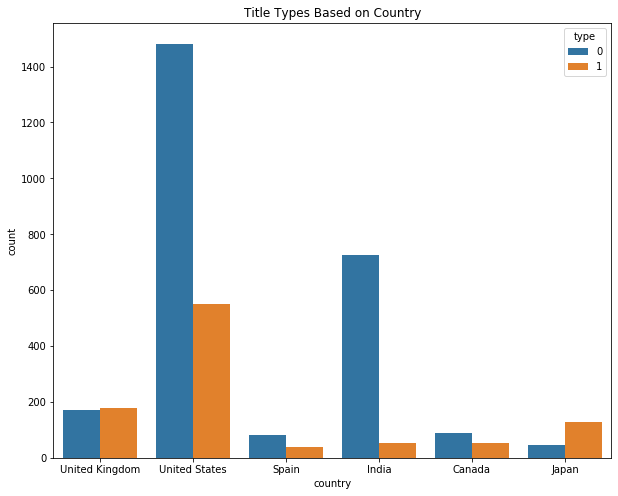

In [98]:
#bar chart displaying the types of titles produced based on country 

top_productive_countries=df[(df['country']=='United States')|(df['country']=='India')|(df['country']=='United Kingdom')|(df['country']=='Japan')|
                             (df['country']=='Canada')|(df['country']=='Spain')]
plt.figure(figsize=(10,8))
sns.countplot(x='country',hue='type',data=top_productive_countries)
plt.title('Title Types Based on Country')
plt.show()

***Taking a deeper look into the types of title types produced by each country we see that Netflix tends to prefer to add movies over TV shows. The United Kingdom and Japan are the exceptions to this rule. It appears that when adding titles produced in Japan, twice as many TV shows are added as movies. The number of movie and TV shows added from the UK are about equal.***

### Actor & Director Analysis 

In [99]:
#chart displaying most popular actors/actresses on Netflix based on the country the title is produced in 

def country_trace(country, flag = "movie"):
    df["from_us"] = df['country'].fillna("").apply(lambda x : 1 if country.lower() in x.lower() else 0)
    small = df[df["from_us"] == 1]
    if flag == "movie":
        small = small[small["duration"] != ""]
    else:
        small = small[small["season_count"] != ""]
    cast = ", ".join(small['cast'].fillna("")).split(", ")
    tags = Counter(cast).most_common(25)
    tags = [_ for _ in tags if "" != _[0]]

    labels, values = [_[0]+"  " for _ in tags], [_[1] for _ in tags]
    trace = go.Bar(y=labels[::-1], x=values[::-1], orientation="h", name="", marker=dict(color="#a678de"))
    return trace

from plotly.subplots import make_subplots
traces = []
titles = ["United States", "","India","", "United Kingdom"]
for title in titles:
    if title != "":
        traces.append(country_trace(title))

fig = make_subplots(rows=2, cols=5, subplot_titles=titles)
fig.add_trace(traces[0], 1,1)
fig.add_trace(traces[1], 1,3)
fig.add_trace(traces[2], 1,5)


fig.update_layout(height=1200, showlegend=False)
fig.show()

***There are many actors/actresses on Netflix – for this reason we will examine top actors/actresses by country. The top three most popular actors/actress from the United States are Fred Tatasciore, Tara Strong, and Molly Shannon. The top three most popular actors/actresses from India are Anupam Kher, Shah Rukh Khan, and Naseeruddin Shah. The top three most popular actors/actresses from the United Kingdom are David Attenborough, John Cleese, and Michael Palin.***

### Title Rating Anaysis 

In [59]:
#number of titles rated G, PG, PG-13, R, etc. 

df['rating'].value_counts().sort_values(ascending=False)

TV-MA       2027
TV-14       1698
TV-PG        701
R            508
PG-13        286
NR           218
PG           184
TV-Y7        169
TV-G         149
TV-Y         143
TV-Y7-FV      95
G             37
UR             7
NC-17          2
Name: rating, dtype: int64

***Above you will see the title ratings that are offered on Netflix and the number of titles under each rating.***

Text(0.5, 1.0, 'Title Ratings on Netflix')

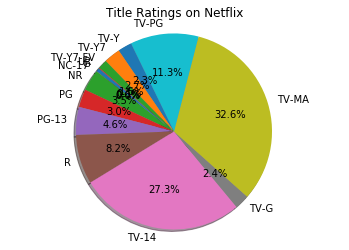

In [60]:
#pie chart displaying distribution of title ratings  

data3 = [37,2,218,184,286,508,1698,149,2027,701,143,169,95,7]
labels = ['G', 'NC-17', 'NR', 'PG', 'PG-13', 'R', 'TV-14', 'TV-G', 'TV-MA', 'TV-PG', 'TV-Y', 'TV-Y7', 'TV-Y7-FV', 'UR']

plt.pie(data3, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title("Title Ratings on Netflix")

***The above pie chart shows the distribution of titles ratings on Netflix*** 

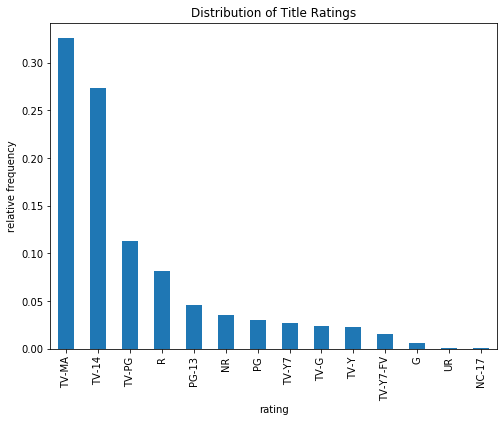

In [54]:
#bar chart displaying distribution of title ratings

plt.figure(figsize=(8,6))
df['rating'].value_counts(normalize=True).plot.bar()
plt.title('Distribution of Title Ratings')
plt.xlabel('rating')
plt.ylabel('relative frequency')

plt.show()

***There are many different title ratings on Netflix (G, PG, PG-13, R, etc.). The top three ratings that contain the highest number of titles are TV-MA, TV-14, and TV-PG.***

In [298]:
#title ratings based on age - child (0-12), teen (13-17), adult (18+)

data4 = [['Child', 1478], ['Teen', 1986], ['Adult', 2535], ['Unrated', 225]]
df4 = pd.DataFrame(data4, columns = ['Rating', 'Count']) 
df4

,Rating,Count
0,Child,1478
1,Teen,1986
2,Adult,2535
3,Unrated,225


Text(0.5, 1.0, 'Title Ratings on Netflix by Age')

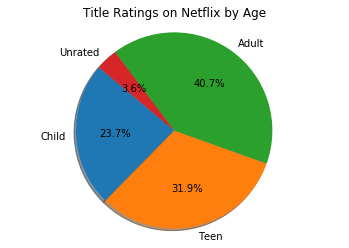

In [299]:
#pie chart displaying title ratings based on age 

data5 = [1478,1986,2535,225]
labels = ['Child', 'Teen', 'Adult', 'Unrated']

plt.pie(data5, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title("Title Ratings on Netflix by Age")

***The above pie chart displays the title ratings on Netflix by age. From the chart we can confirm that the majority of titles are intended for adults and teenagers- this is likely Netflix's target audience.***

In [300]:
#distribution of title ratings based on country title is produced in 

for i in top_productive_countries['country'].unique():
    print(i)
    print(top_productive_countries[top_productive_countries['country']==i]['rating'].value_counts(normalize=True)*100)
    print('-'*10)

United Kingdom
TV-MA       39.942529
TV-14       23.275862
TV-PG       17.816092
R            7.471264
TV-G         6.034483
NR           2.298851
PG           0.862069
TV-Y7        0.862069
TV-Y         0.574713
TV-Y7-FV     0.287356
PG-13        0.287356
G            0.287356
Name: rating, dtype: float64
----------
United States
TV-MA       30.704781
TV-14       16.707738
R           13.405619
TV-PG       10.399211
PG-13        8.279941
PG           5.027107
NR           4.435683
TV-G         3.006407
TV-Y7        2.562839
TV-Y7-FV     2.069985
TV-Y         1.971414
G            1.281419
UR           0.098571
NC-17        0.049285
Name: rating, dtype: float64
----------
Spain
TV-MA    65.811966
TV-14    18.803419
NR        6.837607
TV-PG     3.418803
R         1.709402
PG        1.709402
TV-Y      0.854701
TV-G      0.854701
Name: rating, dtype: float64
----------
India
TV-14       54.182754
TV-MA       23.423423
TV-PG       16.731017
NR           2.445302
TV-G         0.900901
TV-Y7

***Looking at title ratings based on producing country, we see that the majority of titles produced in the United States and the United Kingdom that are available on Netflix are rated TV-14 and TV-MA. The third most popular title rating for the United States is R, while the third most popular rating for the United Kingdom is TV-PG.***

### Netflix Movie  Analysis  

***Now that we have done exploratory data analysis and visualization, lets start with the predictive analysis. First I will merge out current dataset with an additional dataset contain information about movies offered on other streaming platforms. Once we have merged the datasets we will preform a logistic regression to determine the factors that are important when considering adding movies to Netflix. The factors that we will be looking at are year added, release year, IMDb rating, Rotten Tomatoes rating, title rating, runtime, and whether or not the movie is available on Hulu, Prime Video, and Disney+.***

In [105]:
#import dataset 

df9=pd.read_csv("MoviesOnStreamingPlatforms.csv")
df9.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [106]:
#merge datsets
df9=df9.rename(columns={'Title':'title'})

df10 = pd.merge(df,df9,on='title', how='right')
df10.head()

,type,title,director,cast,country,year_added,release_year,rating,duration,listed_in,...,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0.0,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019,2019.0,TV-PG,90 min,"Children & Family Movies, Comedies",...,1,0,0,0,0,"Richard Finn,Tim Maltby","Animation,Adventure,Comedy,Family","United States,India,South Korea,China",English,90.0
1,0.0,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017,2017.0,TV-14,99 min,Comedies,...,1,0,0,0,0,Fernando Lebrija,"Comedy,Drama,Romance",United States,English,99.0
2,0.0,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada",2017,2014.0,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers",...,1,0,0,0,0,Gabe Ibáñez,"Action,Drama,Sci-Fi,Thriller","Spain,Bulgaria",English,109.0
3,0.0,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,2017,2017.0,TV-MA,60 min,Stand-Up Comedy,...,1,0,0,0,0,"Francisco Schultz,Rodrigo Toro Solovera",Comedy,Chile,Spanish,NaN
4,0.0,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden",2017,2014.0,R,90 min,"Action & Adventure, Thrillers",...,1,0,0,0,0,Henrik Ruben Genz,"Action,Crime,Thriller","United States,United Kingdom,Denmark,Sweden",English,90.0


In [107]:
#drop unnecessary coloumns 

df10.drop (["cast"], axis = 1, inplace = True)
df10.drop (["country"], axis = 1, inplace = True)
df10.drop (["duration"], axis = 1, inplace = True)
df10.drop (["listed_in"], axis = 1, inplace = True)
df10.drop (["Year"], axis = 1, inplace = True)
df10.drop (["Unnamed: 0"], axis = 1, inplace = True)
df10.drop (["ID"], axis = 1, inplace = True)
df10.drop (["Age"], axis = 1, inplace = True)
df10.drop (["Type"], axis = 1, inplace = True)
df10.drop (["Directors"], axis = 1, inplace = True)
df10.drop (["Country"], axis = 1, inplace = True)
df10.drop (["Language"], axis = 1, inplace = True)
df10.drop (["title"], axis = 1, inplace = True)
df10.drop (["Genres"], axis = 1, inplace = True)
df10.drop (["director"], axis = 1, inplace = True)
df10.drop (["Hulu"], axis = 1, inplace = True)
df10.drop (["Prime Video"], axis = 1, inplace = True)
df10.drop (["Disney+"], axis = 1, inplace = True)
df10.drop (["type"], axis = 1, inplace = True)

df10.head()

,year_added,release_year,rating,from_us,IMDb,Rotten Tomatoes,Netflix,Runtime
0,2019,2019.0,TV-PG,0.0,3.1,NaN,1,90.0
1,2017,2017.0,TV-14,0.0,5.2,NaN,1,99.0
2,2017,2014.0,R,0.0,6.1,30%,1,109.0
3,2017,2017.0,TV-MA,0.0,4.9,NaN,1,NaN
4,2017,2014.0,R,1.0,5.5,9%,1,90.0


In [108]:
#convert rating to categorical value

df10['rating'] = df10['rating'].map({'G' : 1, 'NC-17': 2, 'NR': 3, 'PG': 4, 'PG-13': 5, 'R': 6, 'TV-14': 7, 'TV-G': 8, 'TV-MA': 9, 'TV-PG': 10, 'TV-Y': 11, 'TV-Y7': 12, 'TV-Y7-FV': 13, 'UR': 14})
df10.head()

,year_added,release_year,rating,from_us,IMDb,Rotten Tomatoes,Netflix,Runtime
0,2019,2019.0,10.0,0.0,3.1,NaN,1,90.0
1,2017,2017.0,7.0,0.0,5.2,NaN,1,99.0
2,2017,2014.0,6.0,0.0,6.1,30%,1,109.0
3,2017,2017.0,9.0,0.0,4.9,NaN,1,NaN
4,2017,2014.0,6.0,1.0,5.5,9%,1,90.0


***Rating Key: G(1), NC-17(2), NR(3), PG(4), PG-13(5), R(6), TV-14(7), TV-G(8), TV-MA(9), TV-PG(10), TV-Y(11), TV-Y7(12), TV-Y7-FV(13), UR(14)***

In [305]:
#convert Rotten Tomatoes value to percentage 

df10['Rotten Tomatoes'] = df10['Rotten Tomatoes'].str.rstrip('%').astype('float') / 100.0
df10.head()

,year_added,release_year,rating,from_us,IMDb,Rotten Tomatoes,Netflix,Runtime
0,2019,2019.0,10.0,0.0,3.1,NaN,1,90.0
1,2017,2017.0,7.0,0.0,5.2,NaN,1,99.0
2,2017,2014.0,6.0,0.0,6.1,0.30,1,109.0
3,2017,2017.0,9.0,0.0,4.9,NaN,1,NaN
4,2017,2014.0,6.0,1.0,5.5,0.09,1,90.0


In [306]:
#convert column year added to numeric 

df10['year_added'] = pd.to_numeric(df10['year_added'])

df10.head()

,year_added,release_year,rating,from_us,IMDb,Rotten Tomatoes,Netflix,Runtime
0,2019.0,2019.0,10.0,0.0,3.1,NaN,1,90.0
1,2017.0,2017.0,7.0,0.0,5.2,NaN,1,99.0
2,2017.0,2014.0,6.0,0.0,6.1,0.30,1,109.0
3,2017.0,2017.0,9.0,0.0,4.9,NaN,1,NaN
4,2017.0,2014.0,6.0,1.0,5.5,0.09,1,90.0


In [307]:
#drop null values in dataset

df10 = df10.dropna(subset=['Rotten Tomatoes'])
df10.head()


df10.dropna(how='any', inplace=True)
df10.head()

,year_added,release_year,rating,from_us,IMDb,Rotten Tomatoes,Netflix,Runtime
2,2017.0,2014.0,6.0,0.0,6.1,0.30,1,109.0
4,2017.0,2014.0,6.0,1.0,5.5,0.09,1,90.0
8,2017.0,2015.0,6.0,0.0,6.1,0.42,1,107.0
9,2017.0,2015.0,9.0,0.0,6.2,0.58,1,79.0
10,2017.0,2014.0,5.0,0.0,6.8,0.54,1,112.0


In [308]:
#set x and y variables 

X= df10.drop("Netflix",axis=1)
y= df10["Netflix"]

In [309]:
#train dataset

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [310]:
#fit model 

logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [311]:
#prediction 

prediction = logistic_regression.predict(X_test)

In [312]:
#classification report 

classification_report(y_test,prediction)

C:\Users\chasi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00        26\n           1       0.93      1.00      0.96       327\n\n    accuracy                           0.93       353\n   macro avg       0.46      0.50      0.48       353\nweighted avg       0.86      0.93      0.89       353\n'

In [313]:
#confusion matrix 

confusion_matrix(y_test,prediction)

array([[  0,  26],
       [  0, 327]], dtype=int64)

In [314]:
accuracy_score(y_test,prediction)

0.9263456090651558

***While the accuracy score and classifciation report show this logistic regression shows as an accurate model, I worry that the model may not be entirely accurate. The dataset used for this model contains a limited number of samples that were not accepted into Netflix. This may sway the results a bit becuase the model may more often assume that a title will be accepted into Netflix than not simply due to the small amount of data for titles not accepted.*** 

## Netflix TV Show Analysis 

***Because our last dataset did not report accurate results, lets try a new dataset. The dataset I have imported below contains information about tv shows that are offered on different streaming platforms. The goal of our analysis is to determine the factors that contribute to a show being added on Netflix. The factors that we will be looking at are IMDb rating, Rotten Tomatoes rating, year released, and whether or not the show is available on other streaming services (Hulu, Prime Video, Disney+).***

In [315]:
#import data set 

df11=pd.read_csv("TVShowsOnStreamingPlatforms.csv")
df11.head()

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1


In [316]:
#drop unnecessary columns 

df11.drop (["Title"], axis = 1, inplace = True)
df11.drop (["Unnamed: 0"], axis = 1, inplace = True)
df11.drop (["type"], axis = 1, inplace = True)
df11.drop (["Age"], axis = 1, inplace = True)

df11.head()

,Year,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
0,2008,9.5,96%,1,0,0,0
1,2016,8.8,93%,1,0,0,0
2,2017,8.4,91%,1,0,0,0
3,2010,9.1,78%,1,0,0,0
4,2015,8.7,97%,1,0,0,0


In [317]:
#convert percentage to decimal 

df11['Rotten Tomatoes'] = df11['Rotten Tomatoes'].str.rstrip('%').astype('float') / 100.0
df11.head()

,Year,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
0,2008,9.5,0.96,1,0,0,0
1,2016,8.8,0.93,1,0,0,0
2,2017,8.4,0.91,1,0,0,0
3,2010,9.1,0.78,1,0,0,0
4,2015,8.7,0.97,1,0,0,0


In [318]:
#drop null data 

df11.dropna(how='any', inplace=True)
df11.head(10)

,Year,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+
0,2008,9.5,0.96,1,0,0,0
1,2016,8.8,0.93,1,0,0,0
2,2017,8.4,0.91,1,0,0,0
3,2010,9.1,0.78,1,0,0,0
4,2015,8.7,0.97,1,0,0,0
5,2005,8.9,0.81,1,0,0,0
6,2011,8.8,0.83,1,0,0,0
7,2005,8.4,0.93,1,0,0,0
8,2013,8.8,0.92,1,0,0,0
9,2005,9.2,1.00,1,0,0,0


In [319]:
#feature selection 

X= df11.drop("Netflix",axis=1)
y= df11["Netflix"]

model_extra = ExtraTreesClassifier()
model_extra.fit(X, y)
model_extra.score(X, y)

print((model_extra.feature_importances_))

[0.05755388 0.0445273  0.04278063 0.45703478 0.34720238 0.05090103]


In [320]:
#features sorted by rank 
print("Features Sorted By Rank:")
print(sorted(zip([round(x, 4) for x in model_extra.feature_importances_], X.columns)))


Features Sorted By Rank:
[(0.0428, 'Rotten Tomatoes'), (0.0445, 'IMDb'), (0.0509, 'Disney+'), (0.0576, 'Year'), (0.3472, 'Prime Video'), (0.457, 'Hulu')]


***The most important factors are Rotten Tomatoes, IMDb, and whether or not the show is available on Disney+. It seems that whether or not the show is available on Disney+ is a more important factor even than release year. This is an interesting result as Disney+ was recently established and when this happened Netflix likely lost many titles to Disney+.***


In [321]:
#train model 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [322]:
#fit model 

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [323]:
#evaluation metrics 

print(metrics.accuracy_score(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, dt.predict(X_test))) 
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.roc_auc_score(y_test, dt.predict(X_test)))

0.9141914191419142
--------------------------------------------------------
[[161  16]
 [ 10 116]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       177
           1       0.88      0.92      0.90       126

    accuracy                           0.91       303
   macro avg       0.91      0.92      0.91       303
weighted avg       0.92      0.91      0.91       303

--------------------------------------------------------
0.9151197202044659


***The decision tree model is 91.4% accurate. Therefore, we expect that the model will be about 92% accurate when the model is applied into a real-world situation.***

* True Positive Rate (Sensitivity) = 116/126 = 0.92
* False Positive Rate = 16/177 = 0.090
* True Negative Rate (Specificity) = 161/177
* False Negatve Rate = 10/116


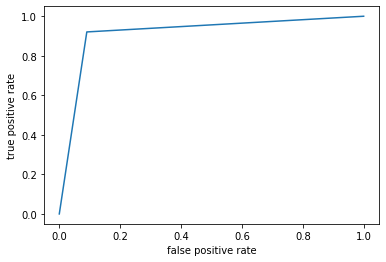

False-positive rate: [0.         0.09039548 1.        ]
True-positive rate:  [0.         0.92063492 1.        ]
AUC score:  0.9151197202044659


In [285]:
#AUC score 

fpr, tpr, thresholds = metrics.roc_curve(y_test,dt.predict(X_test))
plt.subplot()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.plot(fpr, tpr)
plt.show()

print("False-positive rate:", fpr)
print("True-positive rate: ", tpr)
print("AUC score: ", metrics.roc_auc_score(y_test, dt.predict(X_test)))

***The AUC score shows as 91.5%. Overall the model is an accurate model.*** 

## Conclusion

1. What types of titles are available on Netflix? 
    
    The majority of titles on Netflix are movies. 


2. Has Netflix become more focused on TV content over the years? 
    
    While Netflix has begun to add more TV shows starting in 2012, the majority of the content reamins movies. 


3. Which genres on Netflix contain the highest number of titles? 
    
    The genres that contains the highest number of titles are dramas, international tv shows, tv dramas, and independent movies.
    

4. Which countries produce the largest number of titles on Netflix?
    
    The United States, India, and the United Kingdom produce the largest number of titles on Netflix.
    

5. Who are the top actors/actresses on Netflix?
    
      The most popular actor from the US is Fred Tatasciore. The most popular actor from India is Anupam Kher. The most popular actor from the UK is David Attenborough.



6. Which title ratings (G, PG, PG-13, R, etc.) contain the highest number of titles?
    
    The title rating that contains the highest number of titles is TV-MA.


7. What factors are important in determining whether or not a movie/show will be added on Netflix?
  
     The factors that most heavily impact wheter a title will be added on Netflix are Rotten Tomatoes rating, IMDb rating, and whether or not the title is available on Disney+. 